In [2]:
!pip install kaggle
from google.colab import files 
files.upload() #download and upload json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samratalam","key":"04f3b6633583fdfd1704c7e3a2ac2ad5"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d mbkinaci/fruit-images-for-object-detection

 18% 5.00M/28.4M [00:01<00:07, 3.23MB/s]
100% 28.4M/28.4M [00:01<00:00, 17.3MB/s]


In [5]:
#to unzip file

from zipfile import ZipFile
file_name= "fruit-images-for-object-detection.zip"

with ZipFile(file_name ,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
import numpy as np
import pandas as pd
import os #####################
import matplotlib.pyplot as plt
import cv2

from keras.models import Sequential
from keras.layers import Dense , MaxPool2D , Flatten , Dropout , Conv2D

from keras.utils import to_categorical  ###############

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [7]:
#pre processing traning data
#appending images in a list 'train_images'
#appending labels in a list 'train_labels'


train_images =[]
train_labels = []
shape =(200,200)
train_path ='/content/train_zip/train'

for filename in os.listdir('/content/train_zip/train'):
  if filename.split('.')[1] == 'jpg' :                 #apple_1.jpg
    img = cv2.imread(os.path.join(train_path , filename))

    #spliting filenames and storing labels for image in list

    train_labels.append(filename.split('_')[0])    #apple_1.jpg
    
    #resize
    img = cv2.resize(img, shape)

    train_images.append(img)

#convert images into array
train_images = np.array(train_images)
#converting labels into one hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels ).values #########################

#split traning data into train and validation data

x_train , x_val ,y_train , y_val = train_test_split(train_images , train_labels , random_state = 1)##########

In [8]:
#test images preprocessing 
#appending labels in test_labels list
#appendign resize images in test_images list
# The test data contains labels as well also we are appending it to a list 
#but we are'nt going to use it while training.

test_images = []
test_labels = []
shape=(200,200)
test_path ='/content/test_zip/test'

for filename in os.listdir('/content/test_zip/test'):
  if filename.split('.')[1] == 'jpg' :
    img = cv2.imread(os.path.join(test_path, filename))

    test_labels.append(filename.split('_')[0])

    img = cv2.resize(img , shape)

    test_images.append(img)

test_images = np.array(test_images)

#train_labels = pd.get_dummies(train_labels).values





[1 0 0 0]


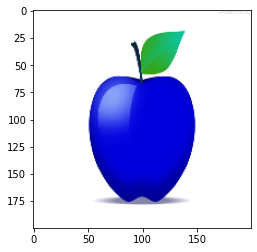

In [9]:
#visualizing the trainnig data
print(train_labels[101])
plt.imshow(train_images[101])


In [10]:
#creating a sequential model
#conv2d--conv2d--maxpool---conv2d--maxppol--conv2d---flatten--dense(3)
model = Sequential()

model.add(Conv2D(filters=32 , kernel_size=(3,3) , activation='tanh' , input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size=(3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size=(3,3),activation='tanh')) ########
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size=(3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu')) #########
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(
    loss='categorical_crossentropy',   #######
    metrics=['acc'],############
    optimizer='adam'############
    

)


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten (Flatten)            (None, 63480)             0

In [12]:
#trainnig the model
history = model.fit(x_train,y_train , epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 24s 6s/step - loss: 5.9333 - acc: 0.1696 - val_loss: 1.4431 - val_acc: 0.3333
Epoch 2/50
4/4 [==============================] - 22s 5s/step - loss: 1.4273 - acc: 0.2951 - val_loss: 1.3948 - val_acc: 0.1500
Epoch 3/50
4/4 [==============================] - 22s 6s/step - loss: 1.3525 - acc: 0.2682 - val_loss: 1.4374 - val_acc: 0.2500
Epoch 4/50
4/4 [==============================] - 22s 6s/step - loss: 1.2790 - acc: 0.3469 - val_loss: 1.1766 - val_acc: 0.5333
Epoch 5/50
4/4 [==============================] - 22s 6s/step - loss: 1.1371 - acc: 0.5509 - val_loss: 1.0283 - val_acc: 0.6167
Epoch 6/50
4/4 [==============================] - 22s 6s/step - loss: 0.9200 - acc: 0.6073 - val_loss: 1.0977 - val_acc: 0.7333
Epoch 7/50
4/4 [==============================] - 22s 6s/step - loss: 0.9673 - acc: 0.7589 - val_loss: 1.0287 - val_acc: 0.6333
Epoch 8/50
4/4 [==============================] - 22s 6s/step - loss: 0.8263 - acc: 0.6920 - val_loss: 0

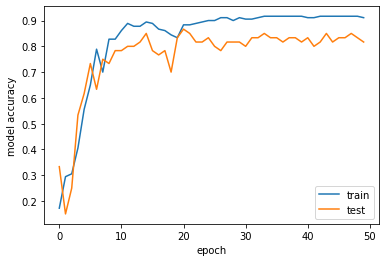

In [13]:
#summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train' , 'test'] , loc= 'lower right')
plt.show()

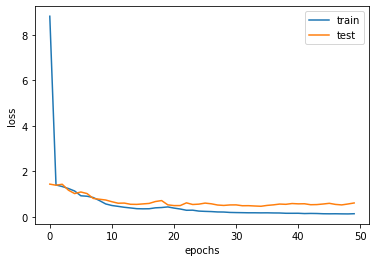

In [14]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])################
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'] , loc='upper right')
plt.show()

In [15]:
#evaluating model on validation data
evaluate = model.evaluate(x_val , y_val)
print(evaluate)

2/2 [==============================] - 2s 841ms/step - loss: 0.6158 - acc: 0.8167
[0.6158422827720642, 0.8166666626930237]


In [27]:
# Testing predictions and the actual label
for i in range(0,60):
  checkImage = test_images[i:i+1]
  checklabel = test_labels[i:i+1]



  predict = model.predict(np.array(checkImage))


  output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

  print(i)
  print("Actual :- ",checklabel)
  print("Predicted :- ",output[np.argmax(predict)])
  if i==59 :
    break





0
Actual :-  ['banana']
Predicted :-  banana
1
Actual :-  ['banana']
Predicted :-  banana
2
Actual :-  ['apple']
Predicted :-  banana
3
Actual :-  ['banana']
Predicted :-  banana
4
Actual :-  ['mixed']
Predicted :-  banana
5
Actual :-  ['orange']
Predicted :-  orange
6
Actual :-  ['mixed']
Predicted :-  orange
7
Actual :-  ['apple']
Predicted :-  apple
8
Actual :-  ['banana']
Predicted :-  banana
9
Actual :-  ['orange']
Predicted :-  orange
10
Actual :-  ['orange']
Predicted :-  orange
11
Actual :-  ['orange']
Predicted :-  orange
12
Actual :-  ['apple']
Predicted :-  apple
13
Actual :-  ['apple']
Predicted :-  apple
14
Actual :-  ['orange']
Predicted :-  orange
15
Actual :-  ['orange']
Predicted :-  orange
16
Actual :-  ['orange']
Predicted :-  orange
17
Actual :-  ['apple']
Predicted :-  apple
18
Actual :-  ['apple']
Predicted :-  apple
19
Actual :-  ['apple']
Predicted :-  apple
20
Actual :-  ['banana']
Predicted :-  banana
21
Actual :-  ['banana']
Predicted :-  banana
22
Actual :- 